In [1]:
pip install pandas 


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import os

# CSV 파일들이 저장된 디렉토리 경로
input_folder = '/Users/gimjeongju/Downloads/094.관광 특화 말뭉치 데이터/3.개방데이터/1.데이터/Training/01.원천데이터/TS_1.관광콘텐츠_2.문화활동_1.축제공연행사'
output_file = './merged_output.csv'

# 디렉토리에서 모든 CSV 파일 읽기
all_files = [f for f in os.listdir(input_folder) if f.endswith('.csv')]

if not all_files:
    print("CSV파일이 없습니다.")
else:
    dataframes = []
    for file in all_files:
        file_path = os.path.join(input_folder, file)
        try:
            df = pd.read_csv(file_path)
            if not df.empty:
                dataframes.append(df)
            else:
                print(f"파일'{file}'은 빈 파일입니다")
        except Exception as e:
            print(f"Error {file}: {e}")

    if dataframes:
        # 데이터프레임 합치기
        merged_df = pd.concat(dataframes, ignore_index=True)
        # 합친 데이터프레임을 새로운 CSV 파일로 저장
        merged_df.to_csv(output_file, index=False)
        print(f"CSV files merged and saved to {output_file}")
    else:
        print("No valid CSV files to merge.")


CSV files merged and saved to ./merged_output.csv


In [ ]:
# 데이터 셋 나누기 
import pandas as pd
from sklearn.model_selection import train_test_split

# CSV 파일 읽기
file_path = "./merged_output.csv"  # 저장한 파일 경로
df = pd.read_csv(file_path)

# 데이터셋 나누기 (train: 80%, test: 20%)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# 나뉜 데이터셋 확인
print(f"Train dataset shape: {train_df.shape}")
print(f"Test dataset shape: {test_df.shape}")

# 나눈 데이터셋 저장
train_df.to_csv("train_dataset.csv", index=False, encoding='utf-8-sig')
test_df.to_csv("test_dataset.csv", index=False, encoding='utf-8-sig')


Train dataset shape: (19272, 13)
Test dataset shape: (4818, 13)


/var/folders/1y/p5qvg_517ld6c7tsjmc0255c0000gn/T/ipykernel_6930/1530425378.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '정보 없음' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna('정보 없음', inplace=True)


추천 축제 리스트:
                     관광지명                                                 개요  \
7              영재국악회 국악공연  한국의 최고 기량을 가진 국악 천재들이 참여하는 독특한 국악 공연으로, 대한민국에서...   
12          서울에서 만나는 세계여행  이 행사에는 6개 대륙에서 온 약 20여 개국의 외국인들과 함께 다양한 해외 문화 ...   
36        사계축제 꽃 기억해 (여름)  올해 서울의 공원에서 열리는 '향기 축제 잊지 말아요'는 새로운 꽃 축제입니다. 이...   
39     서울페스타 2023 명동 페스티벌  서울 명동의 아이코닉한 랜드마크인 '롯데백화점'에서 40주년을 맞아 대규모 페스티벌...   
60                서대문독립축제  2023 서대문독립축제는 광복 78주년을 기념하여 서대문독립공원(형무소역사관 포함)...   
...                   ...                                                ...   
23924         영등포 여의도봄꽃축제  영등포 여의서로 국회 뒤편에서 열리는 '영등포여의도봄꽃축제'는 4년 만에 돌아온 봄...   
23934              밤의 석조전  덕수궁 야간 관람 프로그램인 밤의 석조전은 고종 황제의 이야기를 담은 뮤지컬 공연과...   
23945       유러피언 크리스마스 마켓  11회 유럽 크리스마스 마켓은 주한유럽대사관과 인근 상인협의회의 후원으로 개최되며,...   
23971         제15차 세계산림총회  2022년 5월 2일부터 6일까지 서울 코엑스에서 개최되는 제15차 세계산림총회는 ...   
24019            서울국제작가축제  서울 국제 작가 축제는 2006년부터 시작하여, 독자들의 문학적 경험을 넓히고 세계...   

      카테고리 세부카테고리  지역 활동유형  

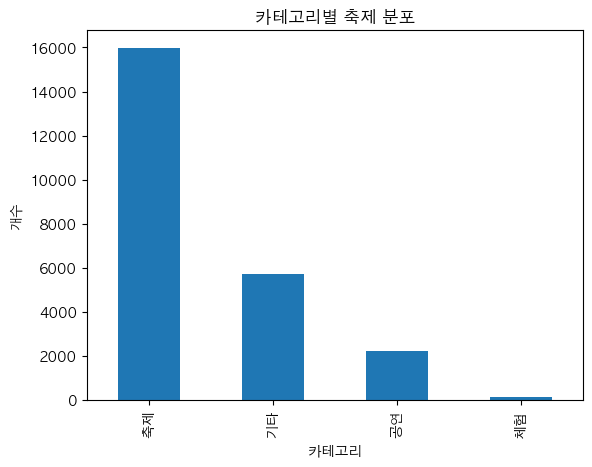

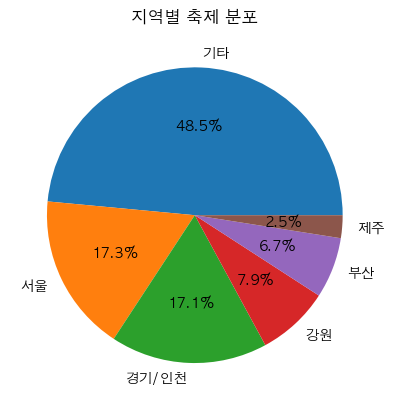

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'  # macOS 기본 한글 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 1. 데이터 로드
file_path = './merged_output.csv'  # CSV 파일 경로를 지정하세요
data = pd.read_csv(file_path)

# 2. 데이터 전처리
# (1) 불필요한 열 제거
data = data.drop(columns=['Unnamed: 12'], errors='ignore')

# (2) 결측치 처리
data.fillna('정보 없음', inplace=True)

# (3) 텍스트 정리
data['개요'] = data['개요'].str.replace(r'\s+', ' ', regex=True).str.strip()

# 3. 카테고리 분류
# (1) 메인 카테고리 분류
def categorize(row):
    if '축제' in row['관광지명'] or '축제' in row['개요']:
        return '축제'
    elif '공연' in row['관광지명'] or '공연' in row['개요']:
        return '공연'
    elif '걷기' in row['관광지명'] or '걷기' in row['개요']:
        return '체험'
    else:
        return '기타'

data['카테고리'] = data.apply(categorize, axis=1)

# (2) 세부 카테고리 분류
def sub_categorize(row):
    if '음악' in row['개요'] or '뮤직' in row['관광지명']:
        return '음악'
    elif '전통' in row['개요'] or '국악' in row['관광지명']:
        return '전통문화'
    elif '음식' in row['개요'] or '커피' in row['관광지명']:
        return '음식/음료'
    else:
        return '기타'

data['세부카테고리'] = data.apply(sub_categorize, axis=1)

# 4. 외국인 추천용 필터
# (1) 지역 분류
def get_region(address):
    if '서울' in address:
        return '서울'
    elif '경기' in address or '인천' in address:
        return '경기/인천'
    elif '제주' in address:
        return '제주'
    elif '부산' in address:
        return '부산'
    elif '강원' in address:
        return '강원'
    else:
        return '기타'

data['지역'] = data['주소(AD)'].apply(get_region)

# (2) 활동 유형 분류
def activity_type(row):
    if '참여' in row['개요'] or '체험' in row['개요']:
        return '참여형'
    elif '공연' in row['개요']:
        return '관람형'
    else:
        return '기타'

data['활동유형'] = data.apply(activity_type, axis=1)

# 5. 결과 저장
data.to_csv('processed_festival_data.csv', index=False)

# 6. 추천 시스템 예시
# 외국인을 위한 추천 예시: 서울 지역의 참여형 축제
recommendation = data[(data['지역'] == '서울') & (data['활동유형'] == '참여형')]

# 추천 결과 확인
print("추천 축제 리스트:")
print(recommendation[['관광지명', '개요', '카테고리', '세부카테고리', '지역', '활동유형']])

# 7. 시각화
# 카테고리별 축제 개수 시각화
data['카테고리'].value_counts().plot(kind='bar', title='카테고리별 축제 분포')
plt.xlabel('카테고리')
plt.ylabel('개수')
plt.show()

# 지역별 축제 개수 시각화
data['지역'].value_counts().plot(kind='pie', title='지역별 축제 분포', autopct='%1.1f%%')
plt.ylabel('')
plt.show()
